In [1]:
target_features = ['GrainYield']
# target_features = ['Days2Maturity']

# Importing Libraries

In [4]:
import os
import csv
import numpy as np
import pandas as pd
from copy import copy
from datetime import datetime as dt

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

# Importing data

In [6]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [7]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [8]:
main_path = r'./Data/'
path = r'./Data/3. merged data/'
if target_features[0] == 'GrainYield':
    export_path = './Data/4. results/'
    export_path_comparability = './Data/4. results/comparability/'
elif target_features[0] == 'Days2Maturity':
    export_path = './Data/4. results_dm/'
    export_path_comparability = './Data/4. results_dm/comparability/'

# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(export_path_comparability, exist_ok=True)

# os.listdir(path)

In [9]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [10]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list

14 files found in the directory


## Data Checking/control

### Check for duplicate filenames

In [11]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [12]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 123)
Graminor_2019_Trapz ===== (600, 123)
Graminor_2020_Simps ===== (800, 123)
Graminor_2020_Trapz ===== (800, 123)
Masbasis_2019_Simps ===== (528, 124)
Masbasis_2019_Trapz ===== (528, 124)
Masbasis_2020_Simps ===== (659, 126)
Masbasis_2020_Trapz ===== (659, 126)
Robot_2020_Simps ===== (96, 125)
Robot_2020_Trapz ===== (96, 125)
Staur_2019_Simps ===== (1328, 127)
Staur_2019_Trapz ===== (1328, 127)
Staur_2020_Simps ===== (1504, 124)
Staur_2020_Trapz ===== (1504, 124)


In [13]:
print(f'Total imported {len(all_df)}')
# all_df

Total imported 14


## Importing Weather variables, yield columns, spectral indices, base indices columsn list

In [14]:
a_file = open(main_path+'vollebekk_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_vollebekk = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_vollebekk))

80


In [15]:
a_file = open(main_path+'staur_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_staur = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_staur))

80


In [16]:
a_file = open(main_path+"yield_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
yield_cols = json.loads(output_str)
a_file.close()
print(yield_cols)

['Entry', 'Replicates', 'Name', 'Lodging', 'GrainYield', 'iBlock', 'Line', 'Pedigree', 'Block', 'Days2Maturity', 'CodeName', 'Heading_Date', 'Days2Heading', 'Maturity_Date']


In [17]:
a_file = open(main_path+"spectral_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
spectral_indices_all = json.loads(output_str)
a_file.close()
print(spectral_indices_all)

['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI', 'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI', 'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI', 'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']


In [18]:
a_file = open(main_path+"base_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
base_indices = json.loads(output_str)
a_file.close()
print(base_indices)

['Blue', 'Green', 'Red', 'RedEdge', 'NIR']


## Defining categories of features

In [19]:
# ToDo: Add check for duplicate columns in the df
base_indices
spectral_indices_all 
drop_indices = ['EVI', 'GLI', 'MTCI']
spectral_indices = [x for x in spectral_indices_all if x not in drop_indices]

# Staur weather columns are all also present in Vollebekk weather so they can be use as general weather features
weather_features = weather_cols_staur.copy()
environment_var = weather_features + ['Staur_Env', 'Vollebekk_Env']
# yield_cols

# Dropping DF which donot have the Target Feature

In [20]:
# Dropping unnecessary columns
all_df_dm = []
for df in all_df:
    temp_df = locals()[df].copy()
    if target_features[0] in temp_df.columns.tolist():
        all_df_dm.append(df)
#         print(df)

In [21]:
all_df_simps = [x for x in all_df_dm if 'Simps' in x]
all_df_trapz = [x for x in all_df_dm if 'Trapz' in x]
# all_df_simps, all_df_trapz

# Dropping unnecessary columns


In [22]:
# Dropping unnecessary columns

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices_all+environment_var+['Name',target_features[0]]]
    print(df, temp_df.shape, '==>', locals()[df].shape)


Graminor_2019_Simps (600, 123) ==> (600, 118)
Graminor_2019_Trapz (600, 123) ==> (600, 118)
Graminor_2020_Simps (800, 123) ==> (800, 118)
Graminor_2020_Trapz (800, 123) ==> (800, 118)
Masbasis_2019_Simps (528, 124) ==> (528, 118)
Masbasis_2019_Trapz (528, 124) ==> (528, 118)
Masbasis_2020_Simps (659, 126) ==> (659, 118)
Masbasis_2020_Trapz (659, 126) ==> (659, 118)
Robot_2020_Simps (96, 125) ==> (96, 118)
Robot_2020_Trapz (96, 125) ==> (96, 118)
Staur_2019_Simps (1328, 127) ==> (1328, 118)
Staur_2019_Trapz (1328, 127) ==> (1328, 118)
Staur_2020_Simps (1504, 124) ==> (1504, 118)
Staur_2020_Trapz (1504, 124) ==> (1504, 118)


# Dealing with Nan values

## Dropping Missing values

In [23]:
# Dropping rows with missing value in any column

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

1  rows dropped in  Graminor_2019_Simps
1  rows dropped in  Graminor_2019_Trapz
1  rows dropped in  Graminor_2020_Simps
1  rows dropped in  Graminor_2020_Trapz
6  rows dropped in  Masbasis_2019_Simps
6  rows dropped in  Masbasis_2019_Trapz
116  rows dropped in  Masbasis_2020_Simps
116  rows dropped in  Masbasis_2020_Trapz
8  rows dropped in  Robot_2020_Simps
8  rows dropped in  Robot_2020_Trapz
0  rows dropped in  Staur_2019_Simps
0  rows dropped in  Staur_2019_Trapz
568  rows dropped in  Staur_2020_Simps
568  rows dropped in  Staur_2020_Trapz


# Normalizing the data using Z-Score from scipy

In [24]:
from scipy.stats import zscore

for df in all_df_dm:
    temp_df = locals()[df].copy()
    for col in temp_df.columns:
        # Checking if the column is not a yield column
        if col not in yield_cols+environment_var:
            temp_df[col] = zscore(temp_df[col])
    locals()[df] = temp_df.copy()
#     print(df)

## Parameters

In [41]:
threshold_all = 'top_25'
sorted_all = True
agg_method = 'Simpsons'
# agg_method = 'Trapezoid'

In [42]:
# training_features = base_indices + spectral_indices + environment_var
# training_features = base_indices + spectral_indices + weather_features
training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()

## List of Final models

### Deep Learning Model

In [135]:
# Defining R2 metric
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [174]:
# Defining R2 metric
from keras import backend as K

def coeff_determination_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( -1*(1 - SS_res/(SS_tot + K.epsilon())) )

In [173]:
models.Sequential?

In [211]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(1)])
    
    model.compile(optimizer='rmsprop', loss=coeff_determination_loss, metrics=[coeff_determination])
    return model

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

groups = X_train[group_feature].values.ravel()

X_train = X_train.drop(['Name'], axis=1).values
X_test = X_test.drop(['Name'], axis=1).values

gkf = list(GroupKFold(n_splits=6).split(X_train, y_train, groups))

In [213]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
train_sc = sc.transform(X_train)
test_sc = sc.transform(X_test)

In [214]:
%%time

import numpy as np
k = 4
num_val_samples = len(train_sc) // k
num_epochs = 50
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    # Prepare the validation data: data from partition # k
    val_data = train_sc[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples:(i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_sc[:i * num_val_samples], train_sc[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate([
        y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]
    ],
                                           axis=0)

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)
    print('fitting done')
    mae_history = history.history['val_coeff_determination']
    all_mae_histories.append(mae_history)

processing fold # 0
fitting done
processing fold # 1
fitting done
processing fold # 2
fitting done
processing fold # 3
fitting done
Wall time: 5min 9s


In [205]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

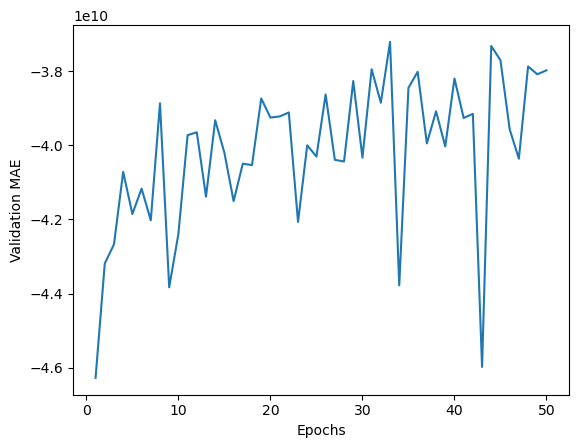

In [206]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

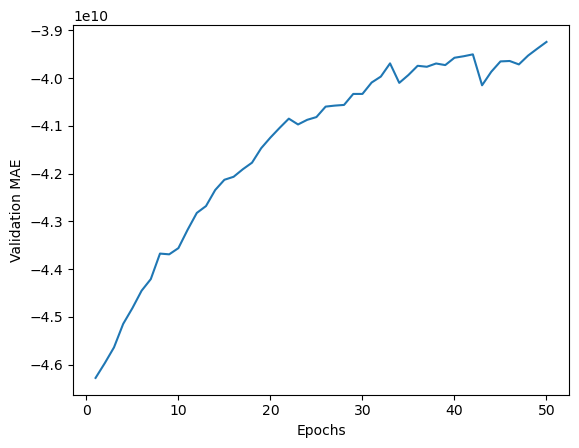

In [210]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []

    for point in points:

        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)

    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [146]:
# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
model.fit(train_sc, y_train, epochs=280, batch_size=16, verbose=0)

train_score, train_score = model.evaluate(test_sc, y_test)
test_score, test_score = model.evaluate(test_sc, y_test)
print(test_score, test_mae_score)

49/49 [==============================] - 0s 582us/step - loss: 3613.5151 - coeff_determination: 0.6928
3613.51513671875 0.692753791809082


In [184]:
# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
history = model.fit(train_sc, y_train, epochs=2000, batch_size=16, verbose=1)


In [192]:
test_mse_score, test_mae_score = model.evaluate(train_sc, y_train)


99/99 [==============================] - 0s 670us/step - loss: -0.8587 - coeff_determination: 0.8587


In [199]:
history.history.keys()

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])

In [189]:
score_history = history.history['coeff_determination']
test_mse_score, test_mae_score = model.evaluate(test_sc, y_test)
print(test_mse_score, test_mae_score)

49/49 [==============================] - 0s 582us/step - loss: -0.6941 - coeff_determination: 0.6949
-0.6940706968307495 0.6949105262756348


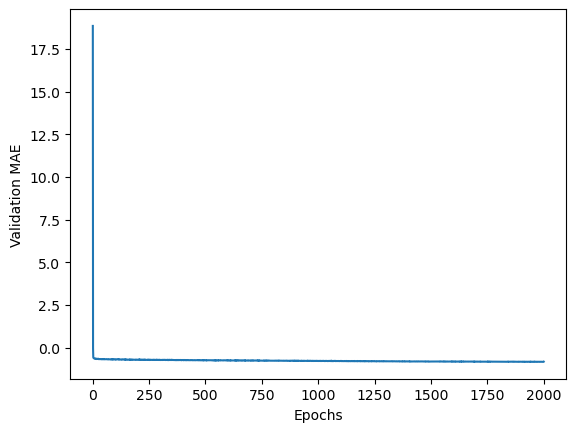

In [190]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(score_history) + 1), score_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

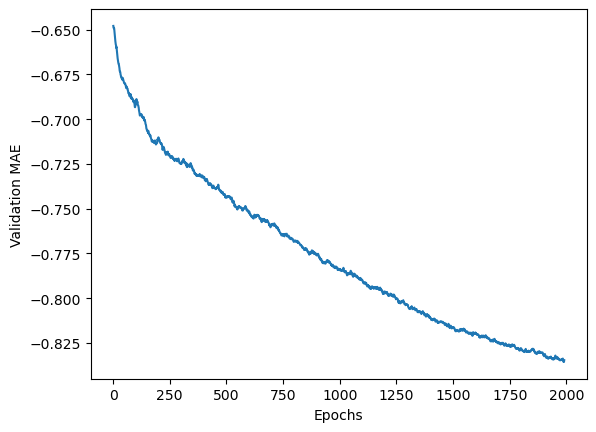

In [191]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []

    for point in points:

        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)

    return smoothed_points


smooth_mae_history = smooth_curve(score_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:

all_mae_histories.append(score_history)



In [123]:
test_mae_score

40.05565643310547

In [142]:

r2_score(y_test, model.predict(X_test).ravel())


-7336179.696848084

In [124]:
y_test_pred = model.predict(test_sc)
output = pd.DataFrame(y_test_pred)
output['Id'] = output.index
output['Predicted'] = output.iloc[:, 0:1]
output[['Id', 'Predicted']].to_csv(export_path+"submission_DNN_relusig.csv", index=False)

## Variations in Datasets

### All data mixed

In [45]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

# Shuffeling all the items
df_shuffle = df_.sample(frac=1, random_state=1).reset_index(drop=True)

X = df_shuffle[training_features]
y = df_shuffle[target_features].values.ravel()
groups = df_shuffle[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))
# gkf = list(StratifiedGroupKFold(n_splits=6, shuffle=True, random_state=1).split(X, y, groups))

#     Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
        model, X, y, gkf)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all)

    save_results(model=model,
                 agg_method=agg_method,
                 train_field='all_mix',
                 test_field='all_mix',
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (temp_list, df_list, df_, X, y, groups, gkf)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

RandomForestRegressor(max_depth=20)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=20))])
 RMSE Test: 3.54        R2 Test: 0.88
RMSE Train: 1.31       R2 Train: 0.98
Lasso(alpha=0.9, max_iter=150)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150))])
 RMSE Test: 4.58        R2 Test: 0.80
RMSE Train: 4.58       R2 Train: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.618951061027474, tolerance: 13.425073577844312
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.44147528954636, tolerance: 13.848278967065871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.10005841006932, tolerance: 13.859737425149705
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=500,
                                           subsample=0.8))])
 RMSE Test: 3.93        R2 Test: 0.85
RMSE Train: 1.29       R2 Train: 0.98
RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=250, min_samples_split=5,
                                       n_estimators=1000, n_jobs=-1,
                                       random_state=0))])
 RMSE Test: 3.51        R2 Test: 0.88
RMSE Train: 1.49       R2 Train: 0.98
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs

### Within same datasets:

In [46]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    df_ = locals()[df].copy()

    X = df_[training_features]
    y = df_[target_features].values.ravel()
    groups = df_[group_feature].values.ravel()

    gkf = list(GroupKFold(n_splits=3).split(X, y, groups))
    print(df)
    #     Getting scores using cross_val_score
    for model in models:
        print(df)
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
            model, X, y, gkf)
        if importances is not None:
            plot_feat_imp(importances,
                          model,
                          training_features,
                          threshold=threshold_all)

        save_results(model=model,
                     agg_method=agg_method,
                     train_field=df,
                     test_field=df,
                     training_features=training_features,
                     importances=importances,
                     RMSE_test=RMSE_test_temp,
                     RMSE_train=RMSE_train_temp,
                     R2_test=R2_test_temp,
                     R2_train=R2_train_temp,
                     GKF_CV=GKF_CV_temp)
    del (df, df_, X, y, groups, gkf)
    del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Masbasis_2019_Simps
Masbasis_2019_Simps
RandomForestRegressor(max_depth=20)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=20))])
 RMSE Test: 1.25        R2 Test: 0.60
RMSE Train: 0.46       R2 Train: 0.95
Masbasis_2019_Simps
Lasso(alpha=0.9, max_iter=150)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150))])
 RMSE Test: 1.78        R2 Test: 0.19
RMSE Train: 1.79       R2 Train: 0.19
Masbasis_2019_Simps
GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=500,
                                           subsample=0.8))])
 RMSE Test: 1.35        R2 Test: 0.52
RMSE Train: 0.09       R2 Train: 1.00
Masbasis_2019_Simps
RandomForestRegressor(max_depth=250, 

### One against all - one2one

In [47]:
# # Iterating through all possible permutations of the fields dataset

# for i in itertools.permutations(all_df_now, 2):
#     train_df = locals()[i[0]].copy()
#     test_df = locals()[i[1]].copy()
    
    
#     X_train = train_df[training_features]
#     y_train = train_df[target_features].values.ravel()
#     X_test = test_df[training_features]
#     y_test = test_df[target_features].values.ravel()
    
#     # Getting scores using cross_val_score
#     for model in models:
#         print('Training: ', i[0],'Test: ', i[1], ' : ', model)
#         importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
#             model, X_train, y_train, X_test, y_test)
#         if importances is not None:
#             plot_feat_imp(importances, model, training_features, threshold=threshold_all, sort_feat=True)
            
#         save_results(model=model,
#              agg_method=agg_method,
#              train_field=i[0],
#              test_field=i[1],
#              training_features=training_features,
#              importances=importances,
#              RMSE_test=RMSE_test_temp,
#              RMSE_train=RMSE_train_temp,
#              R2_test=R2_test_temp,
#              R2_train=R2_train_temp,
#              GKF_CV=GKF_CV_temp)
#     del (i, train_df, test_df, X_train, y_train, X_test, y_test)
#     del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### One aganist all together

In [48]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    if 'Robot' not in df:
        temp_list = [
            x for x in all_df_now if not 'Robot' in x if not df in x
        ]
        print(df, temp_list)

        # Making list of df for conct before training
        # This is different form list of srtings, as this is a list of actual dataframes
        train_df_list = []
        for x in temp_list:
            train_df_list.append(locals()[x])

        train_df = pd.concat(train_df_list)
        test_df = locals()[df].copy()

        X_train = train_df[training_features]
        y_train = train_df[target_features].values.ravel()
        X_test = test_df[training_features]
        y_test = test_df[target_features].values.ravel()

        # Getting scores using cross_val_score
        for model in models:
            print('Training: All  ', 'Test: ', df, ' : ', model)
            importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
                model, X_train, y_train, X_test, y_test)
#             if importances is not None:
#                 plot_feat_imp(importances,
#                               model,
#                               training_features,
#                               threshold=threshold_all,
#                               sort_feat=sorted_all)
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=temp_list,
                         test_field=df,
                         training_features=training_features,
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)
        del (df, temp_list, train_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
        del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Masbasis_2019_Simps ['Masbasis_2020_Simps', 'Staur_2019_Simps']
Training: All   Test:  Masbasis_2019_Simps  :  RandomForestRegressor(max_depth=20)
RandomForestRegressor(max_depth=20)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=20))])
 RMSE Test: 15.416560756873537        R2 Test: -58.27555503225143
RMSE Train: 1.5346695748953842       R2 Train: 0.9727501597257616
Training: All   Test:  Masbasis_2019_Simps  :  Lasso(alpha=0.9, max_iter=150)
Lasso(alpha=0.9, max_iter=150)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150))])
 RMSE Test: 21.787897402779006        R2 Test: -117.39443100968519
RMSE Train: 5.133908816043703       R2 Train: 0.6950486949920132
Training: All   Test:  Masbasis_2019_Simps  :  GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsample=0.8)
GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsamp

### Vollebekk ALL vs Staur ALL

#### Training Staur, Test Vollebekk

In [49]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Training data: ['Staur_2019_Simps']
Test data: ['Masbasis_2019_Simps', 'Masbasis_2020_Simps']
RandomForestRegressor(max_depth=20)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=20))])
 RMSE Test: 12.426280317911278        R2 Test: -0.33503707353618695
RMSE Train: 2.1460098856285885       R2 Train: 0.9362997097179242
Lasso(alpha=0.9, max_iter=150)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150))])
 RMSE Test: 11.37257382714576        R2 Test: -0.11822336602777916
RMSE Train: 6.396654905386828       R2 Train: 0.4340425020057903
GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=500,
                                           subsample=0.8))])
 RMSE

#### Training Vollebekk, Test Staur

In [50]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Training data: ['Masbasis_2019_Simps', 'Masbasis_2020_Simps']
Test data: ['Staur_2019_Simps']
RandomForestRegressor(max_depth=20)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=20))])
 RMSE Test: 8.170336335386281        R2 Test: 0.0766680905416175
RMSE Train: 0.513291521502656       R2 Train: 0.9977220760821792
Lasso(alpha=0.9, max_iter=150)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150))])
 RMSE Test: 132.32061795551195        R2 Test: -241.1770673768079
RMSE Train: 2.3371965780311066       R2 Train: 0.9527717866123043
GradientBoostingRegressor(learning_rate=0.4, random_state=500, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=500,
                                           subsample=0.8))])
 RMSE Tes

### 2020 Vollebekk vs 2020 Staur

#### Training Staur, Test Vollebekk

In [51]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2020')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Training data: []
Test data: ['Masbasis_2020_Simps']


ValueError: No objects to concatenate

#### Training Vollebekk, Test Staur

In [ ]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2020')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### 2019 Vollebekk vs 2019 Staur

#### Training Staur, Test Vollebekk

In [ ]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

In [ ]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")